<img src="../static/aeropython_name_mini.png" alt="AeroPython" style="width: 300px;"/>

# Clase 2a: Introducción a NumPy

_Hasta ahora hemos visto los tipos de datos más básicos que nos ofrece Python: integer, real, complex, boolean, list, tuple...  Pero ¿no echas algo de menos? Efectivamente, los __arrays__. _

_Durante esta nos adentraremos en el paquete NumPy: veremos como los arrays mejoran la eficiencia de nuestro código, aprenderemos a crearlos y a operar con ellos_.

## ¿Qué es un array? 

Un array es un __bloque de memoria que contiene elementos del mismo tipo__. Básicamente:

* nos _recuerdan_ a los vectores, matrices, tensores...
* podemos almacenar el array con un nombre y acceder a sus __elementos__ mediante sus __índices__.
* ayudan a gestionar de manera eficiente la memoria y a acelerar los cálculos.


---

| Índice     | 0     | 1     | 2     | 3     | ...   | n-1   | n  |
| ---------- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Valor      | 2.1   | 3.6   | 7.8   | 1.5   | ...   | 5.4   | 6.3 |

---

__¿Qué solemos guardar en arrays?__

* Vectores y matrices.
* Datos de experimentos:
    - En distintos instantes discretos.
    - En distintos puntos del espacio.
* Resultado de evaluar funciones con los datos anteriores.
* Discretizaciones para usar algoritmos de: integración, derivación, interpolación...
* ... 

## ¿Qué es NumPy?

NumPy es un paquete fundamental para la programación científica que __proporciona un objeto tipo array__ para almacenar datos de forma eficiente y una serie de __funciones__ para operar y manipular esos datos.
Para usar NumPy lo primero que debemos hacer es importarlo:

In [1]:
import numpy as np
#para ver la versión que tenemos instalada:
np.__version__

'1.9.0'

## Nuestro primer array

¿No decíamos que Python era fácil? Pues __creemos nuestros primeros arrays__:

In [2]:
import numpy as np

In [3]:
# Array de una dimensión
mi_primer_array = np.array([1, 2, 3, 4]) 
mi_primer_array

array([1, 2, 3, 4])

In [4]:
# Podemos usar print
print(mi_primer_array)

[1 2 3 4]


In [5]:
# Comprobar el tipo de mi_primer_array
type(mi_primer_array)

numpy.ndarray

In [6]:
# Comprobar el tipo de datos que contiene
mi_primer_array.dtype

dtype('int64')

Los arrays de una dimensión se crean pasándole una lista como argumento a la función `np.array`. Para crear un array de dos dimensiones le pasaremos una _lista de listas_:

In [7]:
# Array de dos dimensiones
mi_segundo_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

<div class="alert alert-info">Podemos continuar en la siguiente línea usando `\`, pero no es necesario escribirlo dentro de paréntesis o corchetes</div>

Esto sería una buena manera de definirlo, de acuerdo con el [PEP 8 (indentation)](http://legacy.python.org/dev/peps/pep-0008/#indentation):

In [8]:
mi_segundo_array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
    ]) 

### Funciones y constantes de NumPy

Hemos dicho que NumPy también incorporá __funciones__. Un ejemplo sencillo:

In [9]:
# Suma
np.sum(mi_primer_array)

10

In [10]:
# Máximo
np.max(mi_primer_array)

4

In [11]:
# Seno
np.sin(mi_segundo_array)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ],
       [ 0.6569866 ,  0.98935825,  0.41211849]])

Y algunas __constantes__ que podemos neccesitar:

In [12]:
np.pi, np.e

(3.141592653589793, 2.718281828459045)

## Características de los arrays de NumPy

El objeto tipo array que proporciona NumPy (Python ya dispone de un tipo array que sirve para almacenar elementos de igual tipo pero no proporciona toda la artillería matemática necesaria como para hacer operaciones de manera rápida y eficiente) se caracteriza por:

### 1) Homogeneidad de tipo:

Comencemos viendo que ocurre con las __listas__:

In [13]:
lista = [ 1, 1+2j, True, 'aerodinamica', [1, 2, 3] ]
lista

[1, (1+2j), True, 'aerodinamica', [1, 2, 3]]

En el caso de los __arrays__:

In [14]:
array = np.array([ 1, 1+2j, True, 'aerodinamica'])
array

array(['1', '(1+2j)', 'True', 'aerodinamica'], 
      dtype='<U64')

__¿Todo bien? Pues no__. Mientras que en la lista cada elemento conserva su tipo, en el array, todos han de tener el mismo y NumPy ha considerado que todos van a ser string.

### 2) Tamaño fijo en el momento de la creación:

__¡Tranquilo!__ los __allocate__ son automáticos...

Igual que en el caso anterior, comencemos con la __lista__:

In [15]:
print(id(lista))
lista.append('fluidos')
print(lista)
print(id(lista))

139998521305288
[1, (1+2j), True, 'aerodinamica', [1, 2, 3], 'fluidos']
139998521305288


In [16]:
print(id(array))
array = np.append(array, 'fluidos')
print(array)
print(id(array))

139998351447504
['1' '(1+2j)' 'True' 'aerodinamica' 'fluidos']
139998351448304


Si consultamos la ayuda de la función `np.append` escribiendo en una celda `help(np.append)` podemos leer:

    Returns
    -------
    append : ndarray
        A copy of `arr` with `values` appended to `axis`.  Note that `append` does not occur in-place: a new array is allocated and filled.  If `axis` is None, `out` is a flattened array.

### 3) Eficiencia

Hasta el momento los arrays han demostrado ser bastante menos flexibles que las listas, luego olvidemos estos últimos 10 minutos y manejemos siempre listas... ¿no? ¡Pues no! Los arrays realizan una gestión de la memoria mucho más eficiente que mejora el rendimiento.

Prestemos atención ahora a la velocidad de ejecución gracias a la _función mágica_ `%%timeit`, que colocada al inicio de una celda nos indicará el tiempo que tarda en ejecutarse. 

In [17]:
lista = list(range(0,100000))
type(lista)

list

In [18]:
%%timeit
sum(lista)

1000 loops, best of 3: 1.61 ms per loop


In [19]:
array = np.arange(0, 100000)

In [20]:
%%timeit
np.sum(array)

10000 loops, best of 3: 98.2 µs per loop


Como ves, las mejoras en este caso son de 2 órdenes de magnitud. __NumPy nos ofrece funciones que se ejecutan prácticamente en tiempos de lenguaje compilado (Fortran, C, C++) y optimizado, pero escribiendo mucho menos código y con un nivel de abstracción mayor__. Conociendo una serie de buenas prácticas, podremos competir en velocidad con nuestros códigos en Python. Para casos en los que no sea posible, existen herramientas que nos permiten ejecutar desde Python nuestros códigos en otros lengujes como [f2py](http://docs.scipy.org/doc/numpy-dev/f2py/). Este tema puede resultarte algo avanzado a estas alturas, pero bastante útil; puedes consultar este [artículo de pybonacci](http://pybonacci.org/2013/02/22/integrar-fortran-con-python-usando-f2py/9) si lo necesitas.

## Funciones para crear arrays

¿Demasiada teoría? vayamos a la práctica. Ya hemos visto que la función `np.array()` nos permite crear arrays con los valores que nosotros introduzcamos manualmente a través de listas. Más adelante, aprenderemos a leer ficheros y almacenarlos en arrays. Mientras tanto, ¿qué puede hacernos falta?

#### array de ceros

In [21]:
# En una dimensión
np.zeros(100)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [22]:
# En dos dimensiones
np.zeros([10,10])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

<div class="alert alert-info"><strong>Nota:</strong> 
En el caso 1D es válido tanto `np.zeros([5])` como `np.zeros(5)` (sin los corchetes), pero no lo será para el caso nD
</div>

#### array "vacío"

In [23]:
np.empty(10)

array([  6.91684881e-310,   2.03912117e-316,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000])

<div class="alert alert-error"><strong>Importante:</strong> 
El array vacío se crea en un tiempo algo inferior al array de ceros. Sin embargo, el valor de sus elementos será arbitrario y dependerá del estado de la memoria. Si lo utilizas asegúrate de que luego llenas bien todos sus elementos porque podrías introducir resultados erróneos.
</div>

#### array de unos

In [24]:
np.ones([3,2])

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

<div class="alert alert-info"><strong>Nota:</strong> 
Otras funciones muy útiles son `np.zeros_like` y `np.ones_like`. Usa la ayuda para ver lo que hacen si lo necesitas.
</div>

#### array identidad

In [25]:
np.identity(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

<div class="alert alert-info"><strong>Nota:</strong> 
También puedes probar `np.eye()` y `np.diag()`.
</div>

### Rangos

#### np.arange

NumPy, dame __un array que vaya de 0 a 5__:

In [26]:
a = np.arange(0, 5)
a

array([0, 1, 2, 3, 4])

__Mira con atención el resultado anterior__, ¿hay algo que deberías grabar en tu cabeza para simpre?
__El último elemento no es 5 sino 4__

NumPy, dame __un array que vaya de 0 a 10, de 3 en 3__:

In [27]:
np.arange(0,11,3)

array([0, 3, 6, 9])

#### np.linspace

Si has tenido que usar MATLAB alguna vez, seguro que esto te suena:

In [28]:
np.linspace(0, 10, 21)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

En este caso sí que se incluye el último elemento.

<div class="alert alert-info"><strong>Nota:</strong> 
También puedes probar `np.logspace()`
</div>

### reshape

Con `np.arange()` es posible crear "vectores" cuyos elementos tomen valores consecutivos o equiespaciados, como hemos visto anteriormente. ¿Podemos hacer lo mismo con "matrices"? Pues sí, pero no usando una sola función. Imagina que quieres crear algo como esto:

\begin{pmatrix}
    1 & 2 & 3\\ 
    4 & 5 & 6\\
    7 & 8 & 9\\
    \end{pmatrix}
    
* Comenzaremos por crear un array 1d con los valores $(1,2,3,4,5,6,7,8,9)$ usando `np.arange()`.
* Luego le daremos forma de array 2d. con `np.reshape(array, (dim0, dim1))`.

In [34]:
a = np.arange(1,10)
M = np.reshape(a, [3,3])
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [35]:
# También funciona como método
N = a.reshape([3,3])
N

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

<div class="alert alert-info"><strong>Nota:</strong> 
No vamos a entrar demasiado en qué son los métodos, pero debes saber que están asociados a la programación orientada a objetos y que en Python todo es un objeto. Lo que debes pensar es que son unas funciones especiales en las que el argumento más importante (sobre el que se realiza la acción) se escribe delante seguido de un punto. Por ejemplo: `<objeto>.método(argumentos)`
</div>

## Importación

Python es un lenguaje que está altamente modularizado: está dividido en __bibliotecas que realizan tareas específicas__. Para hacer uso de ellas debemos importarlas. Podemos importar cosas de la [biblioteca estándar](https://docs.python.org/3.4/library/), de paquetes que hayamos descargado (o se enceuntren en [nuestra distribución](http://docs.continuum.io/anaconda/pkg-docs.html)) o de módulos que nosotros mismos construyamos. 

Existen varias formas de importar:

    import numpy
    
Cada vez que queramos acceder a una función de numpy, deberemos escribir:
    
    numpy.sin(5)
    numpy.linspace(0,100,50)
    
---
Como esto puede resultar tedioso, suele utilizarse un __namespace__, el recomendado en la documentación oficial y que usaremos en el curso es:

    import numpy as np
    
Ahora podremos llamar a funciones escribiendo:

    np.sin(5)
    np.linspace(0,100,50)
    
---
Si esto te sigue pareciendo demasido escribir puedes hacer (__altamente no recomendado__):

    from numpy import *
    
El asterisco, quiere decir _TODO_. Esto genera varios problemas: 

* __Imporatará gran cantidad de funciones y clases que puede que no necesites__.
* El nombre de estas funciones, puede coincidir con el de alguna de otro módulo que hayas importado, de manera que "la machacará", por lo que __se producirán ambigüedades__.

##### Ejemplo: ¿por qué no hacer from numpy import * ?

In [36]:
from numpy import *

a = [1,2,3,4,5]
sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427])

In [37]:
from math import *

sin(a)

TypeError: a float is required

__La función seno que incorporá math no es la misma que la de NumPy__. Ambas proporcionarán el seno de un número, evidentemente, el mismo resultado para el mismo número, pero una acepta listas y la otra no. Al hacer la segunda importación, la función seno de NumPy se ha sustituido por la de math y la misma sentencia, da un error. Esto puede hacer que te vuelvas un poco loco si tu código es grande o acabes volviendo loco a alguien si usa tu código.

¿Suficiente? Ahora ya sabes por qué tendrás que escribir `np.loquesea` __siempre__.

<div class="alert alert-error"><strong>Importante:</strong> Reiniciemos el kernel e importemos bien NumPy para continuar.</div>

In [1]:
import numpy as np

## Operaciones

### Operaciones elemento a elemento

Ahora que pocas cosas se nos escapan de los arrays, probemos a hacer algunas operaciones. El funcionamiento es el habitual en FORTRAN y MATLAB y poco hay que añadir:

In [2]:
#crear un arra y y sumarle un número
arr = np.arange(11)
arr + 55

array([55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [3]:
#multiplicarlo por un número
arr * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [4]:
#elevarlo al cuadrado
arr ** 2

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [5]:
#calcular una función
np.tanh(arr)

array([ 0.        ,  0.76159416,  0.96402758,  0.99505475,  0.9993293 ,
        0.9999092 ,  0.99998771,  0.99999834,  0.99999977,  0.99999997,  1.        ])

<div class="alert alert-info"><strong>Entrenamiento:</strong> 
Puedes tratar de comparar la diferencia de tiempo entre realizar la operación en bloque, como ahora, y realizarla elemento a elemento, recorriendo el array con un bucle.
</div>

__Si las operaciones involucran dos arrays también se realizan elemento a elemento__

In [6]:
#creamos dos arrays
arr1 = np.arange(0,11)
arr2 = np.arange(20,31)

In [7]:
#los sumamos
arr1 + arr2

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])

In [8]:
#multiplicamos
arr1 * arr2

array([  0,  21,  44,  69,  96, 125, 156, 189, 224, 261, 300])

#### Comparaciones

In [9]:
# >,<
arr1 > arr2

array([False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

In [10]:
# ==
arr1 == arr2 # ¡ojo! los arrays son de integers, no de floats

array([False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

<div class="alert alert-info"><strong>Nota:</strong> 
Por cierto, ¿qúe ocurrirá si los arrays con los que se quiere operar no tiene la misma forma? ¿apuestas? Quizá más adelante te interese buscar algo de información sobre __broadcasting__.
</div>

## Ejercicios

1. Crear un array z1 3x4 lleno de ceros de tipo entero.
2. Crear un array z2 3x4 lleno de ceros salvo la primera fila que serán todo unos.
3. Crear un array z3 3x4 lleno de ceros salvo la última fila que será el rango entre 5 y 8.
4. Crea un vector de 10 elementos, siendo los impares unos y los pares doses.
5. Crea un «tablero de ajedrez», con unos en las casillas negras y ceros en las blancas.

In [11]:
a = np.zeros((3, 4))
a

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [12]:
a[0, :] = 1
a

array([[ 1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [13]:
b = np.zeros((3, 4))
b[-1] = np.arange(5, 9)
b

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 5.,  6.,  7.,  8.]])

In [14]:
v = np.ones(10)
v[::2] = 2
v

array([ 2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.])

In [15]:
tablero = np.zeros((8, 8))
tablero[1::2, ::2] = 1
tablero[::2, 1::2] = 1
tablero

array([[ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.]])

Extra:

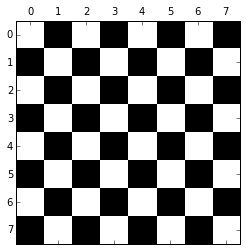

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(tablero, cmap=plt.cm.gray_r)

---

___Hemos aprendido:___

* Las características de los arrays de NumPy:
    - Homogeneidad de tipo.
    - Tamaño fijo en el momento de la creación.
* A usar las principales funciones para crear arrays.
* A operar con arrays.

_En definitiva:_
* __Ingenieros y científicos $\heartsuit$ arrays.__
* __Ingenieros y científicos necesitan NumPy.__

__El próximo día__ aprenderemos cómo acceder a elementos de un array _slicing_, cómo realizar algunas operaciones de álgebra lineal (determinantes, trazas, autovalores...)  y practicaremos todo lo aprendido.

__¡Quiero más!__Algunos enlaces:

Algunos enlaces en Pybonacci:

* [Cómo crear matrices en Python con NumPy](http://pybonacci.wordpress.com/2012/06/11/como-crear-matrices-en-python-con-numpy/).
* [Números aleatorios en Python con NumPy y SciPy](http://pybonacci.wordpress.com/2013/01/11/numeros-aleatorios-en-python-con-numpy-y-scipy/).


Algunos enlaces en otros sitios:

* [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html). Es posible que de momento sólo sepas hacer los primeros, pero tranquilo, pronto sabrás más...
* [NumPy and IPython SciPy 2013 Tutorial](http://conference.scipy.org/scipy2013/tutorial_detail.php?id=100).
* [NumPy and SciPy documentation](http://docs.scipy.org/doc/).

---

Clase en vídeo, parte del [Curso de Python para científicos e ingenieros](http://cacheme.org/curso-online-python-cientifico-ingenieros/) grabado en la Escuela Politécnica Superior de la Universidad de Alicante.

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("UltVlYCacD0", width=560, height=315, list="PLGBbVX_WvN7bMwYe7wWV5TZt1a58jTggB")

---

Si te ha gustado esta clase:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Curso-AeroPython-UC3M/" data-text="Aprendiendo Python con" data-via="AeroPython" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/juanluiscanor" data-format="inline" data-related="false"></script> <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/alejandrosaezm" data-format="inline" data-related="false"></script>

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [2]:
%%html
<a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())